In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/R04_10")
# dataset = pd.read_csv("./R04_25")


In [6]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [7]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,...,-8.0,-35.0,-45.0,-66.0,-39.0,-33.0,-48.0,-39.0,-39.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,...,-40.0,-68.0,-65.0,-84.0,-52.0,-21.0,-42.0,-31.0,-34.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,...,-22.0,-50.0,-35.0,-48.0,-18.0,-20.0,-42.0,-29.0,-27.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,...,-60.0,-78.0,-64.0,-68.0,-41.0,-44.0,-62.0,-34.0,-43.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,...,-55.0,-70.0,-54.0,-63.0,-37.0,-60.0,-70.0,-34.0,-45.0,0


In [ ]:
# data = dataset.iloc[: ,:32]
# data['label'] = dataset['label']

In [ ]:
# data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Fp2.,Af7.,Af3.,Afz.,Af4.,Af8.,F7..,F5..,F3..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,...,-60.0,-7.0,-11.0,17.0,-22.0,-23.0,-15.0,12.0,-23.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,...,-136.0,-83.0,-82.0,-61.0,-92.0,-97.0,-80.0,-52.0,-96.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,...,-135.0,-98.0,-101.0,-79.0,-108.0,-102.0,-103.0,-65.0,-101.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,...,-139.0,-75.0,-80.0,-75.0,-100.0,-90.0,-78.0,-52.0,-98.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,...,-140.0,-78.0,-79.0,-67.0,-95.0,-102.0,-83.0,-58.0,-95.0,0


In [8]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns={"label"})
Y = dataset['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [9]:
train_accuracies = []

In [10]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128,kernel_size=2,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [12]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)
    train_accuracies.append(history.history['accuracy'][0])



epoch 1/100
4938/4938 [==============================] - 35s 5ms/step - loss: 0.8679 - accuracy: 0.5882
epoch 2/100
4938/4938 [==============================] - 25s 5ms/step - loss: 0.6913 - accuracy: 0.6791
epoch 3/100
4938/4938 [==============================] - 25s 5ms/step - loss: 0.6173 - accuracy: 0.7132
epoch 4/100
4938/4938 [==============================] - 24s 5ms/step - loss: 0.5735 - accuracy: 0.7326
epoch 5/100
4938/4938 [==============================] - 25s 5ms/step - loss: 0.5423 - accuracy: 0.7488
epoch 6/100
4938/4938 [==============================] - 26s 5ms/step - loss: 0.5193 - accuracy: 0.7592
epoch 7/100
4938/4938 [==============================] - 25s 5ms/step - loss: 0.5011 - accuracy: 0.7682
epoch 8/100
4938/4938 [==============================] - 24s 5ms/step - loss: 0.4845 - accuracy: 0.7774
epoch 9/100
4938/4938 [==============================] - 25s 5ms/step - loss: 0.4690 - accuracy: 0.7845
epoch 10/100
4938/4938 [==============================] - 24s 5m

In [13]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.8558
Test Accuracy: 0.7837


In [14]:
print(train_accuracies)

[0.5882189273834229, 0.6791337728500366, 0.7131556272506714, 0.7325966954231262, 0.7488165497779846, 0.7592458724975586, 0.7681816816329956, 0.7774465680122375, 0.784490168094635, 0.7898756861686707, 0.7953878045082092, 0.8002164363861084, 0.8040578365325928, 0.8082789182662964, 0.8130252361297607, 0.8160375952720642, 0.819309413433075, 0.8226698637008667, 0.8263657093048096, 0.8287451863288879, 0.8301121592521667, 0.832567572593689, 0.8363393545150757, 0.8383517861366272, 0.8399402499198914, 0.8411933183670044, 0.8451105952262878, 0.8464459180831909, 0.8482685089111328, 0.849154531955719, 0.8504012227058411, 0.8520593047142029, 0.8544450998306274, 0.8554703593254089, 0.8571030497550964, 0.8576789498329163, 0.8594762682914734, 0.8604951500892639, 0.8620836138725281, 0.864488422870636, 0.8645453453063965, 0.8664502501487732, 0.8663995862007141, 0.868393063545227, 0.8695005774497986, 0.8700637817382812, 0.8700700998306274, 0.8719243407249451, 0.8725572228431702, 0.8754809498786926, 0.875

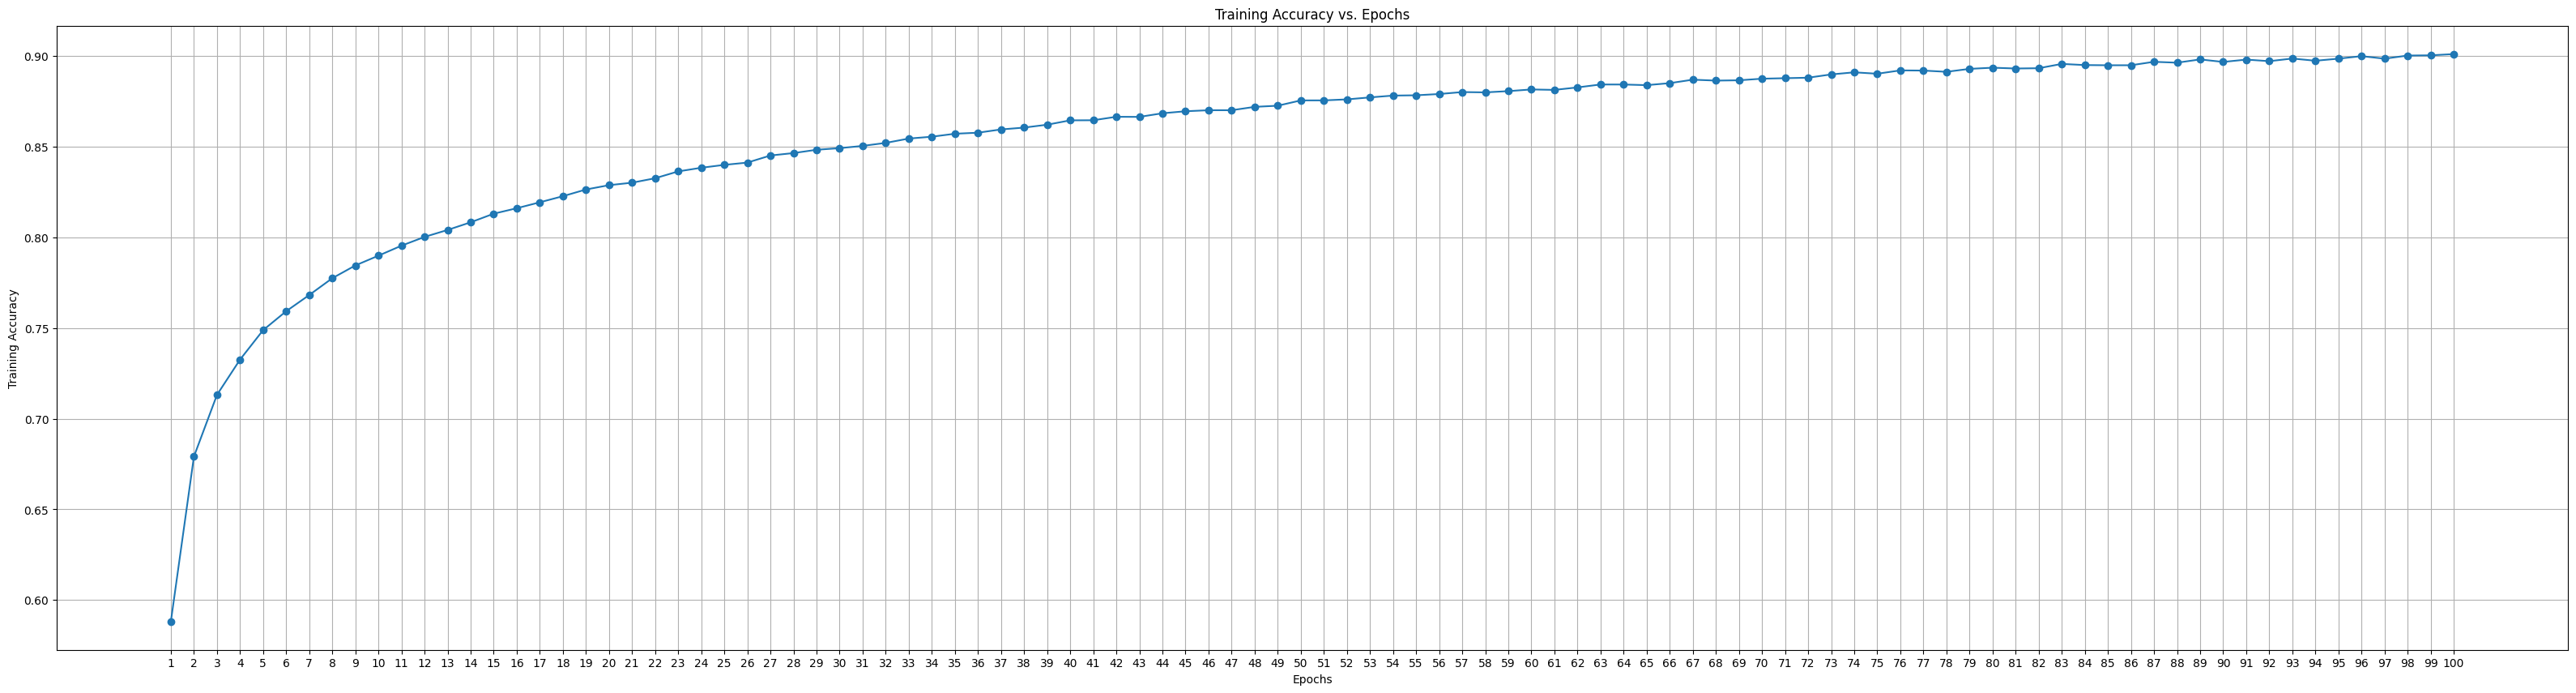

In [15]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [16]:
print(sum(train_accuracies))

85.63890367746353


In [17]:
print(max(train_accuracies))

0.9010226726531982
